In [42]:
#import des librairies
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [27]:
#création des différents dataframe
features = pd.read_csv("features.txt",sep='\t',header=None)

x_train = pd.read_csv("Train/X_train.txt",delimiter=' ',sep='\t',header=None)
y_train = pd.read_csv("Train/y_train.txt",delimiter=' ',sep='\t',header=None)

x_train.columns = list(features[0])
y_train.columns = ["activity"]

x_test = pd.read_csv("Test/X_test.txt",delimiter=' ',sep='\t',header=None)
y_test = pd.read_csv("Test/y_test.txt",delimiter=' ',sep='\t',header=None)

y_test.columns=["activity"]
x_test.columns=list(features[0])

labels = list(pd.read_csv("activity_labels.txt",sep='\t',header=None)[0])
activity_labels = []
for label in labels:
        l = label.split()
        activity_labels.append(l[1])

In [3]:
x_train.head()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080


In [4]:
x_test.head()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,-0.757099,...,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,...,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,...,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302
3,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,-0.798401,...,0.164515,-0.359352,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079
4,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,-0.798401,...,-0.056085,-0.544467,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a41634f90>,
      dtype=object)

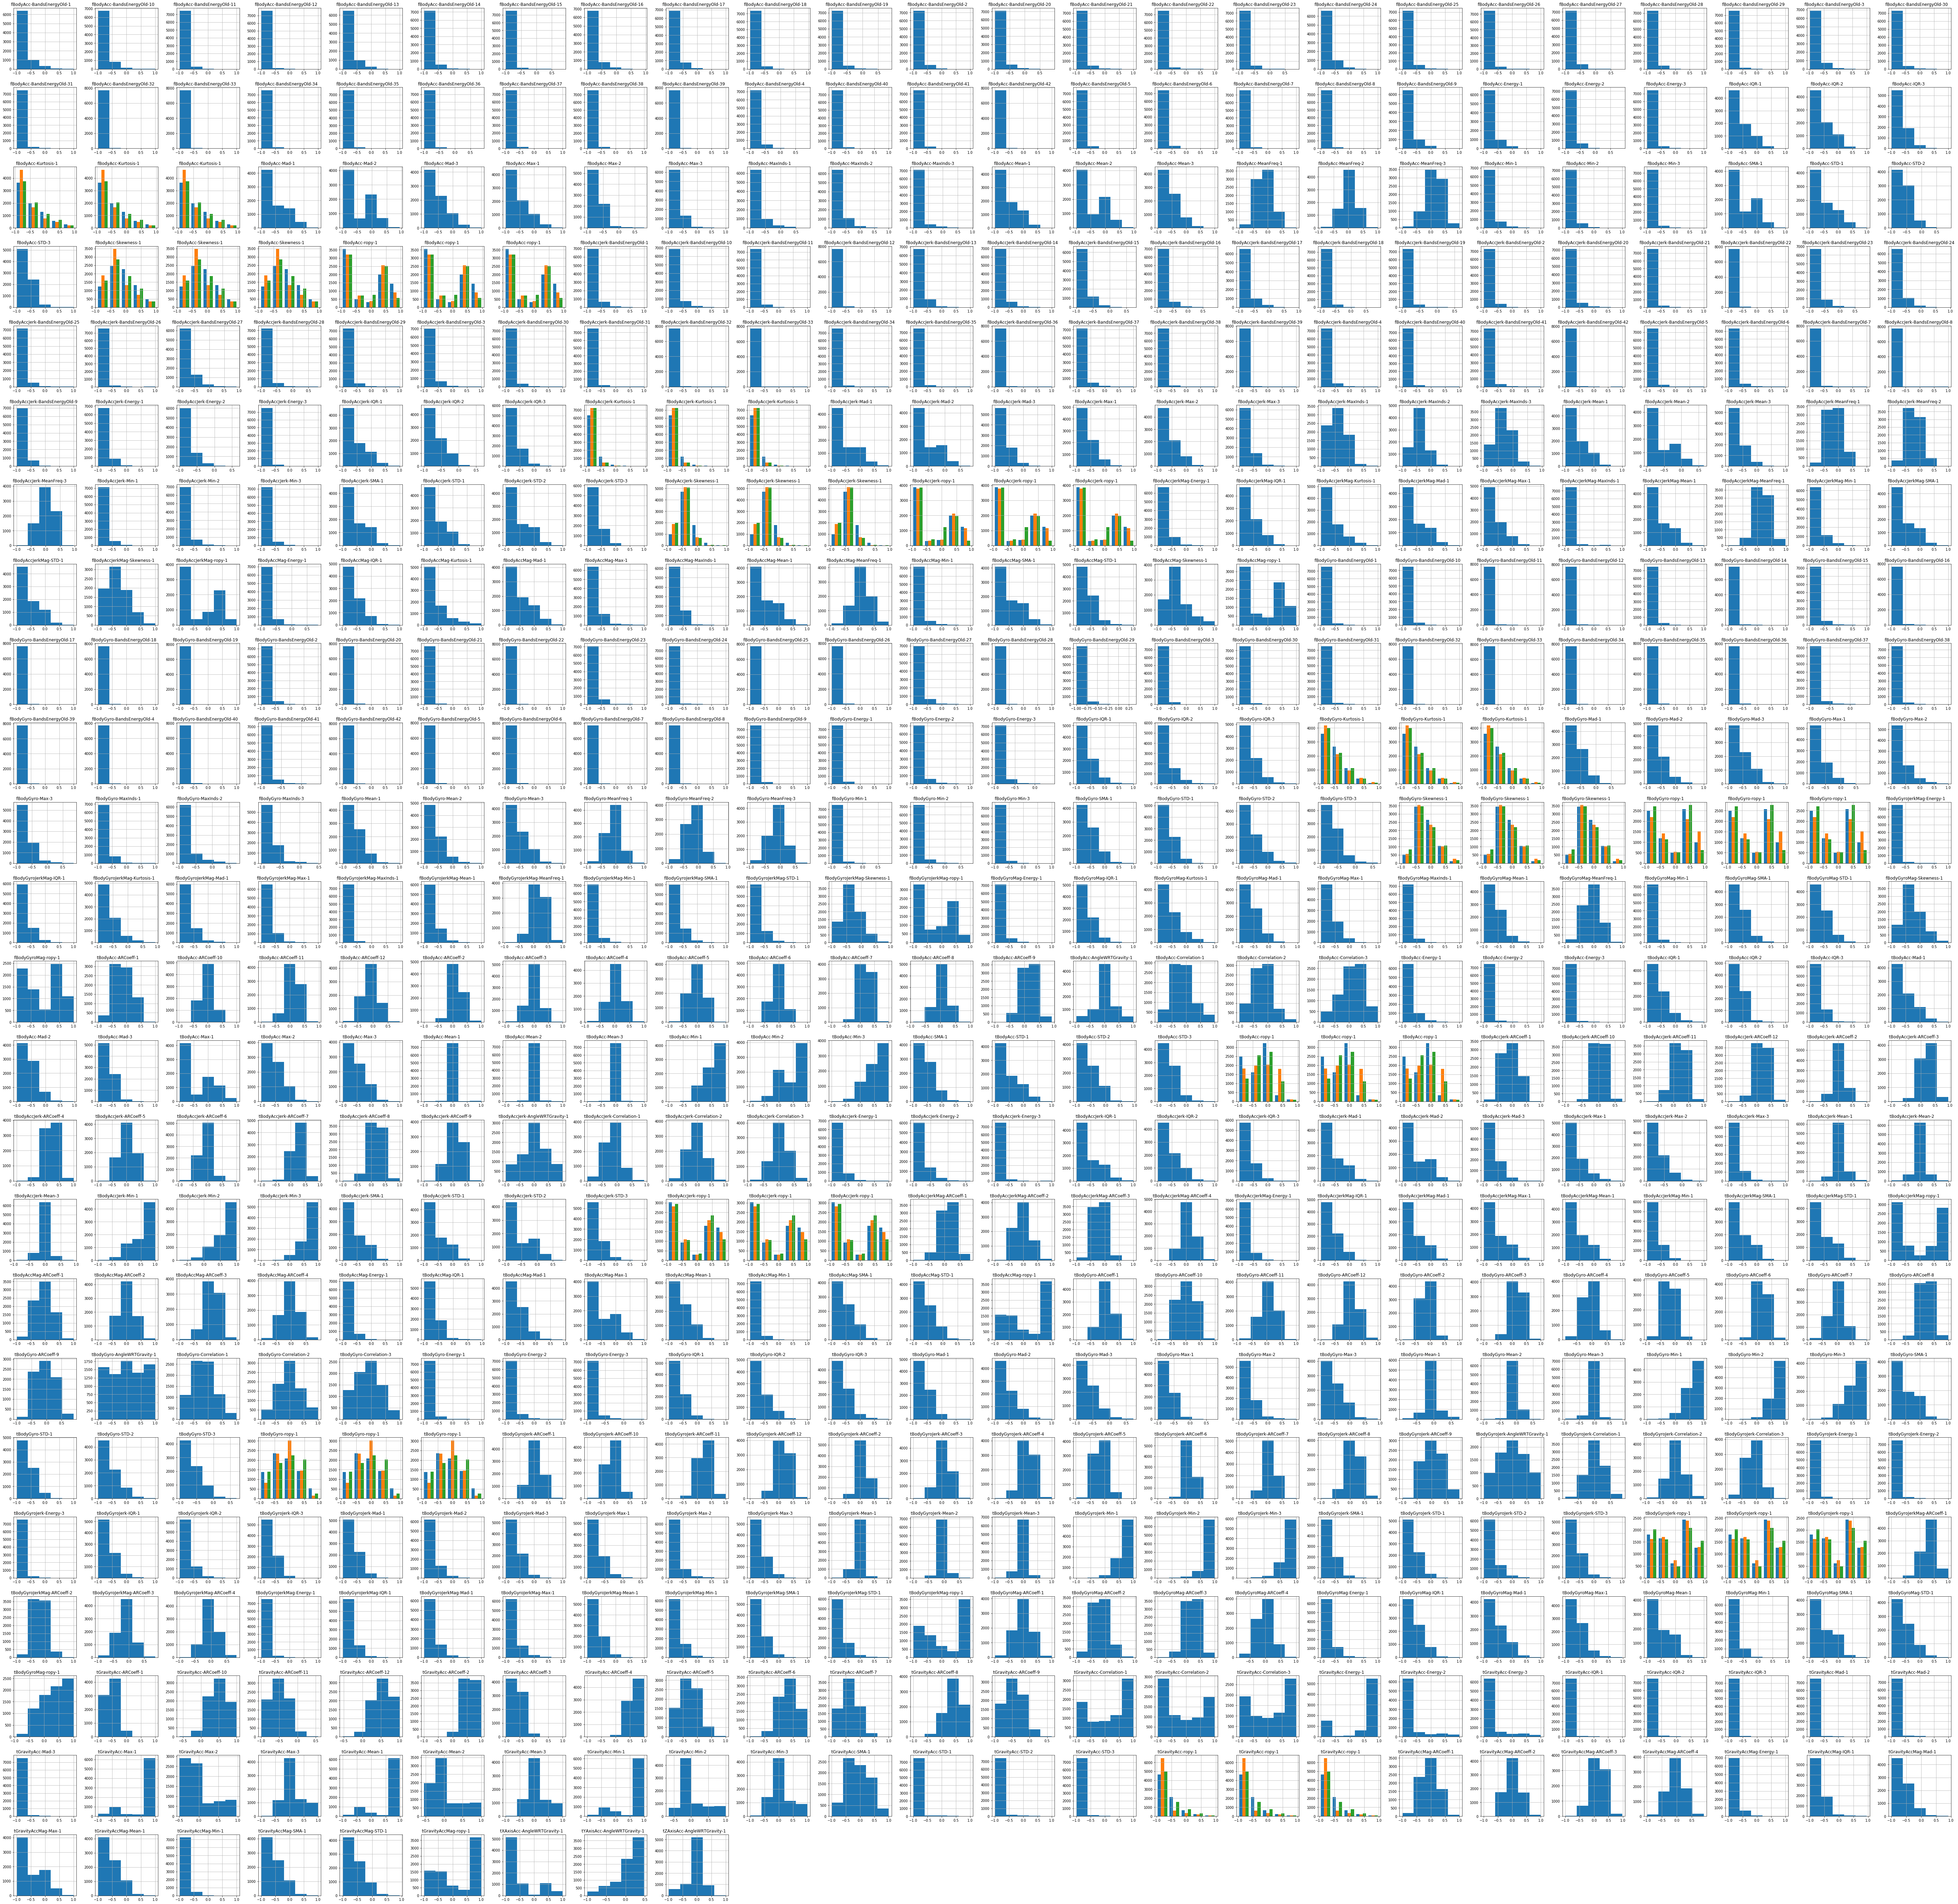

In [47]:
#observons les fréquences des features
x_train.hist(bins=5, figsize=(100, 100))

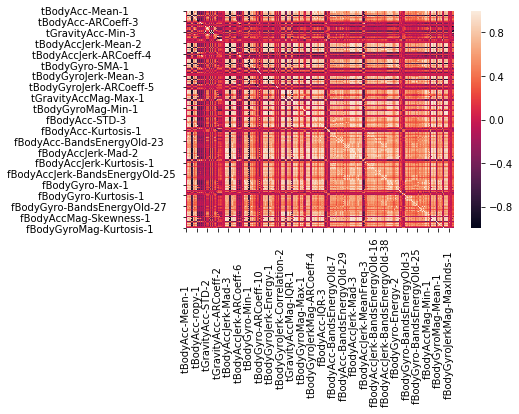

In [5]:
#regardons les corrélations entre nos colonnes
sns.heatmap(x_train.corr())

In [31]:
pca = PCA(n_components=200)
pca = pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
x_train_pca.shape

(7767, 200)

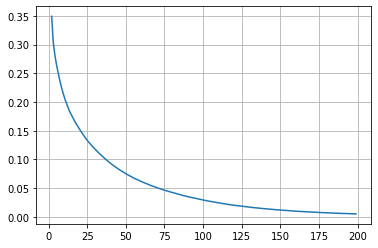

In [8]:
#regardons si nous pouvons passer à une dimension inférieure.
pca_v=[]
for k in range(2,200):
    pca=PCA(n_components=k).fit(x_train)
    pca_v.append(1-sum(pca.explained_variance_ratio_))
    
plt.plot(range(2,200),pca_v)
plt.grid(True)  

In [32]:
pca = PCA(n_components=200)
pca = pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
x_train_pca.shape

#+ le résultat est proche de 100, moins on a perdu d'informations.
print(sum(pca.explained_variance_ratio_))

0.9948950142497986


In [14]:
x_train_pca.shape

(7767, 200)

In [33]:
#LogisticRegression

#Entrainement du modèle
lr = LogisticRegression()
lr = lr.fit(x_train_pca,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [34]:
#prédiction
y_predit_test = lr.predict(x_test_pca)

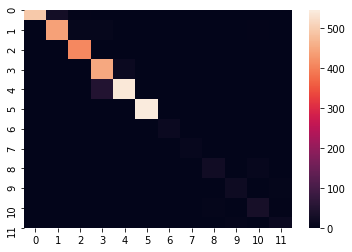

In [35]:
#Grâce à la heatmap & à la matrice de confusion nous pouvons vérifier si le modèle a préduit correctement.
sns.heatmap(confusion_matrix(y_predit_test,y_test))

In [36]:
pd.DataFrame(confusion_matrix(y_predit_test,y_test),columns=activity_labels,index=activity_labels)

,WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS,SITTING,STANDING,LAYING,STAND_TO_SIT,SIT_TO_STAND,SIT_TO_LIE,LIE_TO_SIT,STAND_TO_LIE,LIE_TO_STAND
WALKING,494,29,4,0,1,0,0,0,0,0,2,0
WALKING_UPSTAIRS,0,441,7,7,0,0,1,0,0,0,3,1
WALKING_DOWNSTAIRS,2,1,409,0,0,0,0,0,0,0,0,0
SITTING,0,0,0,450,16,0,2,0,0,0,1,0
STANDING,0,0,0,51,539,0,2,0,0,0,0,0
LAYING,0,0,0,0,0,545,0,0,0,0,1,0
STAND_TO_SIT,0,0,0,0,0,0,17,0,0,0,0,0
SIT_TO_STAND,0,0,0,0,0,0,0,10,0,0,0,0
SIT_TO_LIE,0,0,0,0,0,0,0,0,25,0,10,0
LIE_TO_SIT,0,0,0,0,0,0,0,0,0,20,0,5


In [96]:
#94.75% des prédictions sont bonnes avec les paramètres utilisés
accuracy_score(y_predit_test,y_test)

0.9475015812776724

In [39]:
#SVM
SVM = svm.SVC(decision_function_shape="ovo", kernel='linear').fit(x_train_pca, y_train)
res = SVM.predict(x_test_pca)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
#94.9% des prédictions sont bonnes avec les paramètres utilisés
print(SVM.score(x_test_pca, y_test))

0.9493991144845034


In [45]:
#Random Forest
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(x_train_pca, y_train)
res = rf.predict(x_test_pca)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [44]:
#86.87% des prédictions sont bonnes avec les paramètres utilisés
print(rf.score(x_test_pca, y_test))

0.8687539531941809
